In [1]:
# Import libraries:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Query the database to extract dataset:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('SELECT * FROM useducation',con=engine)

# Dispose open connection, as we're only doing a single query:
engine.dispose()

In [3]:
# Print out the first 5 rows of the dataset:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [4]:
# Check for column datatypes and missing values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [5]:
# Fill in missing values using yearly average:
years= df['YEAR'].unique()

for year in years:
     df[df['YEAR']==year] = df[df['YEAR']==year].fillna(df[df['YEAR']==year].mean())
        
# Fill in the rest of the missing values using interpolate method:
df = df.interpolate(axis=0, limit_direction='both')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1492 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1492 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G                      1

### 1 - Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

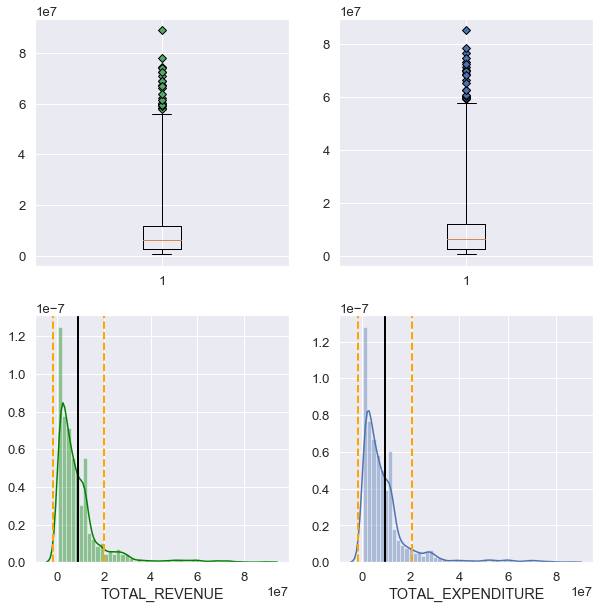

In [51]:
# Detect outliners using visualization method:
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.set(font_scale=1.2)

plt.subplot(2,2,1)
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(df['TOTAL_REVENUE'], whis=5, flierprops=green_diamond)

plt.subplot(2,2,2)
blue_diamond = dict(markerfacecolor='b', marker='D')
plt.boxplot(df['TOTAL_EXPENDITURE'], whis=5,flierprops=blue_diamond )

plt.subplot(2,2,3)
sns.distplot(df['TOTAL_REVENUE'], color='green')
plt.axvline(df['TOTAL_REVENUE'].mean(), linestyle='-', c='black', linewidth=2)
plt.axvline(df['TOTAL_REVENUE'].mean()+df['TOTAL_REVENUE'].std(), c='orange', linestyle='--', linewidth=2)
plt.axvline(df['TOTAL_REVENUE'].mean()-df['TOTAL_REVENUE'].std(), c='orange', linestyle='--', linewidth=2)

plt.subplot(2,2,4)
sns.distplot(df['TOTAL_EXPENDITURE'])
plt.axvline(df['TOTAL_EXPENDITURE'].mean(), linestyle='-', c='black', linewidth=2)
plt.axvline(df['TOTAL_EXPENDITURE'].mean()+df['TOTAL_EXPENDITURE'].std(), c='orange', linestyle='--', linewidth=2)
plt.axvline(df['TOTAL_EXPENDITURE'].mean()-df['TOTAL_EXPENDITURE'].std(), c='orange', linestyle='--', linewidth=2)

plt.show()

As we can see from the plots above, both TOTAL_REVENUE and TOTAL_EXPENDITURE have quite a few outliners (even though we already adjusted 'whis' parameter to 5, which represents Q1-5*IQR and Q3+5IQR). The histograms underneath confirm the findings as we can see that both graphs are right-skewed, with higher values densely distributed at the right of the graphs.

In [56]:
# Detect outliners for 'TOTAL_REVENUE' column using Tukey's IQR method:
q75, q25 = np.percentile(df['TOTAL_REVENUE'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5.5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print('The score threshold is: {}'.format(threshold), ' and The number of outliers is: {}'.format(
        len((np.where((df['TOTAL_REVENUE'] > max_val) 
                      | (df['TOTAL_REVENUE'] < min_val))[0]))))
print(" ")   

# Detect outliners for 'TOTAL_EXPENDITURE' column using Tukey's IQR method:
q75, q25 = np.percentile(df['TOTAL_EXPENDITURE'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5.5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print('The score threshold is: {}'.format(threshold), ' and The number of outliers is: {}'.format(
        len((np.where((df['TOTAL_EXPENDITURE'] > max_val) 
                      | (df['TOTAL_EXPENDITURE'] < min_val))[0]))))

The score threshold is: 1.0  and The number of outliers is: 134
The score threshold is: 1.5  and The number of outliers is: 101
The score threshold is: 2.0  and The number of outliers is: 64
The score threshold is: 2.5  and The number of outliers is: 50
The score threshold is: 3.0  and The number of outliers is: 43
The score threshold is: 3.5  and The number of outliers is: 39
The score threshold is: 4.0  and The number of outliers is: 34
The score threshold is: 4.5  and The number of outliers is: 28
The score threshold is: 5.0  and The number of outliers is: 21
 
The score threshold is: 1.0  and The number of outliers is: 134
The score threshold is: 1.5  and The number of outliers is: 101
The score threshold is: 2.0  and The number of outliers is: 61
The score threshold is: 2.5  and The number of outliers is: 50
The score threshold is: 3.0  and The number of outliers is: 45
The score threshold is: 3.5  and The number of outliers is: 39
The score threshold is: 4.0  and The number of ou

### 2 - If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [57]:
# Apply one way winsorization method to eliminate outliners using the 90th percentile
winsorized_revenue = winsorize(df['TOTAL_REVENUE'], (0, 0.1))
winsorized_expenditure = winsorize(df['TOTAL_EXPENDITURE'], (0, 0.1))

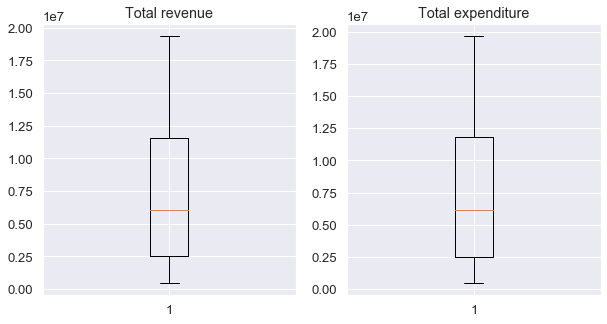

In [24]:
# Visualize winsorized data:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.boxplot(winsorized_revenue, whis=5)
plt.title('Total revenue')

plt.subplot(1,2,2)
plt.boxplot(winsorized_expenditure, whis=5)
plt.title('Total expenditure')

plt.show()

### 3 - Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [34]:
# Create new column 'BUD_DECIFIT_1' = 'TOTAL_REVENUE' - 'TOTAL_EXPENDITURE':
df['BUD_DEFICIT_1']= df['TOTAL_REVENUE'] - df['TOTAL_EXPENDITURE']
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,DEFICIT,BUD_DEFICIT,BUD_DEFICIT_1
0,1992_ALABAMA,ALABAMA,1992,89711.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.307067,25087.0,25087.0,25087.0
1,1992_ALASKA,ALASKA,1992,89711.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,79117.0,30847.0,112335.0,218.410116,266.360319,212.712256,258.859712,77103.0,77103.0,77103.0
2,1992_ARIZONA,ARIZONA,1992,89711.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895,-143501.0,-143501.0,-143501.0
3,1992_ARKANSAS,ARKANSAS,1992,89711.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665,-31063.0,-31063.0,-31063.0
4,1992_CALIFORNIA,CALIFORNIA,1992,89711.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.307067,-878807.0,-878807.0,-878807.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1a21d9e5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a21d979d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a21d97990>],
 'medians': [<matplotlib.lines.Line2D at 0x1a21da6a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a21da6f90>],
 'means': []}

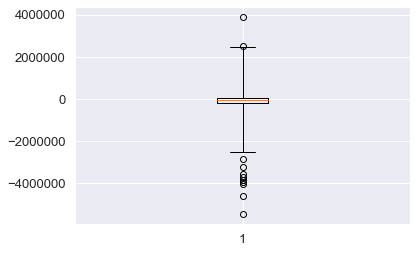

In [35]:
# Plot 'BUD_DEFICIT_1' column to detect outliners:
plt.boxplot(df['BUD_DEFICIT_1'], whis=10)

Since there are outliners on both ends of the boxplot as seen above, we'll use 2-way winsorization technique to eliminate the outliners in 'BUD_DEFICIT_1' column.

(array([ 86.,  23.,  34., 118., 162., 251., 517., 143.,  47., 111.]),
 array([-803208. , -678652.1, -554096.2, -429540.3, -304984.4, -180428.5,
         -55872.6,   68683.3,  193239.2,  317795.1,  442351. ]),
 <a list of 10 Patch objects>)

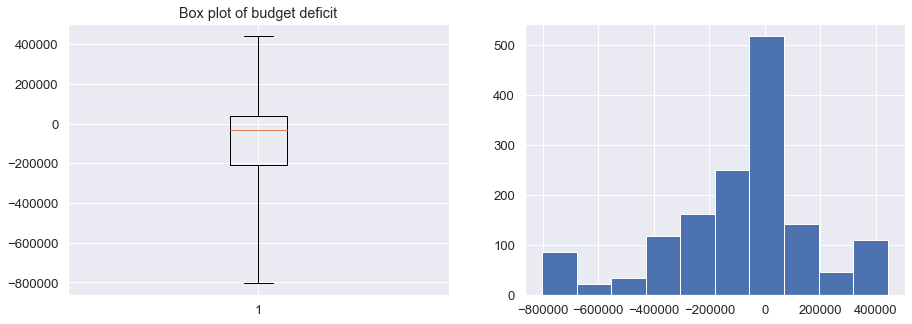

In [36]:
# Eliminate outliners using two-way winsorization at 90th percentile:
winsorized_deficit = winsorize(df['BUD_DEFICIT_1'], (0.05, 0.05))

# Visualize winsorized budget deficit data:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.boxplot(winsorized_deficit, whis=5)
plt.title("Box plot of budget deficit")

plt.subplot(1,2,2)
plt.hist(winsorized_deficit)

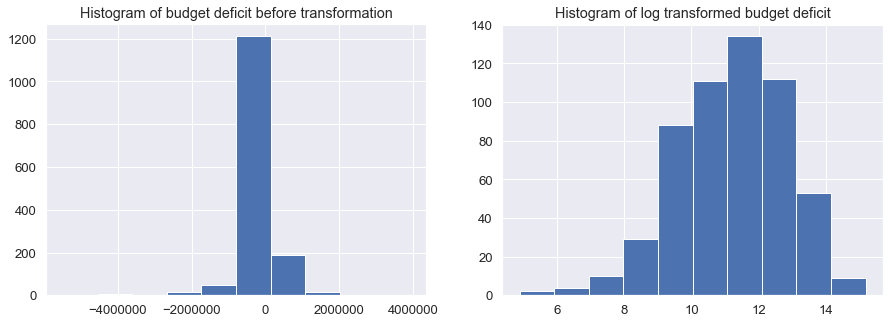

In [37]:
# What if we transform outliners using log transformation?
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(df['BUD_DEFICIT_1'])
plt.title("Histogram of budget deficit before transformation")

plt.subplot(1,2,2)
plt.hist(np.log(df['BUD_DEFICIT_1']))
plt.title("Histogram of log transformed budget deficit")
plt.show()

### 4 - Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a21a3cc10>,
 'caps': [<matplotlib.lines.Line2D at 0x1a22cc6390>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a22cc63d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a21a87590>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a21a3c790>],
 'means': []}

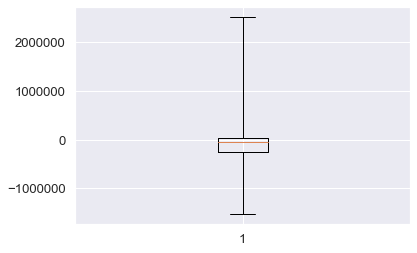

In [63]:
# Create 'BUD_DEFICIT_2' using outliner eliminated version of TOTAL_REVENUE and TOTAL_EXPENDITURE:
df['BUD_DEFICIT_2'] = winsorized_revenue - winsorized_expenditure

# Plot 'BUD_DEFICIT_2' column to detect outliners:
plt.boxplot(df['BUD_DEFICIT_2'], whis=10)

As we can see from the boxplot above, by using outliner eliminated version of TOTAL_REVENUE and TOTAL_EXPENDITURE with whis parameter =10, we no longer has outliner for budget deficit variable.

### 5 - Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [74]:
pd.DataFrame({"winsorized_budget1": df['BUD_DEFICIT_1'],
              "winsorized_budget2": df['BUD_DEFICIT_2']}).describe()

,winsorized_budget1,winsorized_budget2
count,1.492000e+03,1.492000e+03
mean,-1.117876e+05,-7.187035e+04
std,5.339960e+05,2.750053e+05
min,-5.487742e+06,-1.531644e+06
25%,-2.095995e+05,-2.491340e+05
50%,-3.451000e+04,-4.752550e+04
75%,3.704400e+04,2.510800e+04
max,3.897129e+06,2.520706e+06


In [83]:
print('BUD_DEFICIT_1 mean is: {}'.format(round(df['BUD_DEFICIT_1'].mean()),2), 
      'and BUD_DEFICIT_1 median is: {}'.format(df['BUD_DEFICIT_1'].median()))

print('BUD_DEFICIT_2 mean is: {}'.format(round(df['BUD_DEFICIT_2'].mean()),2), 
      'and BUD_DEFICIT_2 median is: {}'.format(df['BUD_DEFICIT_2'].median()))

BUD_DEFICIT_1 mean is: -111788 and BUD_DEFICIT_1 median is: -34510.0
BUD_DEFICIT_2 mean is: -71870 and BUD_DEFICIT_2 median is: -47525.5


As we can see, by using winsorization to elimiate outliners, the mean and median of budget deficit shift closer together, indicating a more normalized distribution. The mean value also is a lot smaller than the original budget deficit number as mean value weren't affected by extreme outliners.